## Import Libiraries

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.segmentation import slic
from skimage.color import label2rgb, rgb2lab, rgb2hsv

import easyocr 

In [2]:
import pytesseract
import re

from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Example path on Windows

In [3]:
from support_functions import * 

## Key Functions

## Import Data 

In [4]:
# Read Images
img1 = cv2.imread('./Images/img1.jpg',cv2.IMREAD_COLOR) 
img2 = cv2.imread('./Images/img2.jpg',cv2.IMREAD_COLOR) 
img3 = cv2.imread('./Images/img3.jpg',cv2.IMREAD_COLOR) 
img4 = cv2.imread('./Images/img4.jpg',cv2.IMREAD_COLOR) 
img5 = cv2.imread('./Images/img5.jpg',cv2.IMREAD_COLOR) 
img6 = cv2.imread('./Images/img6.jpg',cv2.IMREAD_COLOR) 
img7 = cv2.imread('./Images/img7.jpg',cv2.IMREAD_COLOR) 
img8 = cv2.imread('./Images/img8.jpg',cv2.IMREAD_COLOR) 
img9 = cv2.imread('./Images/img9.jpg',cv2.IMREAD_COLOR) 
img10 = cv2.imread('./Images/img10.jpg',cv2.IMREAD_COLOR) 
img11 = cv2.imread('./Images/img11.jpg',cv2.IMREAD_COLOR) 
img12 = cv2.imread('./Images/img12.jpg',cv2.IMREAD_COLOR) 
img13 = cv2.imread('./Images/img13.jpg',cv2.IMREAD_COLOR) 
img14 = cv2.imread('./Images/img14.jpg',cv2.IMREAD_COLOR) 
img15 = cv2.imread('./Images/img15.jpg',cv2.IMREAD_COLOR) 
img16 = cv2.imread('./Images/img16.jpg',cv2.IMREAD_COLOR) 

In [5]:
# Read Images
cimg1 = cv2.imread('./Crop_Images/img1.jpg',cv2.IMREAD_COLOR) 
cimg2 = cv2.imread('./Crop_Images/img2.jpg',cv2.IMREAD_COLOR) 
cimg3 = cv2.imread('./Crop_Images/img3.jpg',cv2.IMREAD_COLOR) 
cimg4 = cv2.imread('./Crop_Images/img4.jpg',cv2.IMREAD_COLOR) 
cimg5 = cv2.imread('./Crop_Images/img5.jpg',cv2.IMREAD_COLOR) 
cimg6 = cv2.imread('./Crop_Images/img6.jpg',cv2.IMREAD_COLOR) 
cimg7 = cv2.imread('./Crop_Images/img7.jpg',cv2.IMREAD_COLOR) 
cimg8 = cv2.imread('./Crop_Images/img8.jpg',cv2.IMREAD_COLOR) 
cimg9 = cv2.imread('./Crop_Images/img9.jpg',cv2.IMREAD_COLOR) 
cimg10 = cv2.imread('./Crop_Images/img10.jpg',cv2.IMREAD_COLOR) 
cimg11 = cv2.imread('./Crop_Images/img11.jpg',cv2.IMREAD_COLOR) 
cimg12 = cv2.imread('./Crop_Images/img12.jpg',cv2.IMREAD_COLOR) 
cimg13 = cv2.imread('./Crop_Images/img13.jpg',cv2.IMREAD_COLOR) 
cimg14 = cv2.imread('./Crop_Images/img14.jpg',cv2.IMREAD_COLOR) 
cimg15 = cv2.imread('./Crop_Images/img15.jpg',cv2.IMREAD_COLOR) 
cimg16 = cv2.imread('./Crop_Images/img16.jpg',cv2.IMREAD_COLOR) 

### Pre-Process the Image

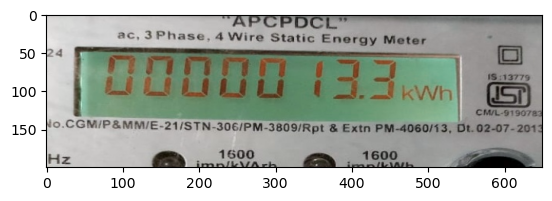

In [40]:
img = reshape_img(cimg1,200, 650)
plt.imshow(img)

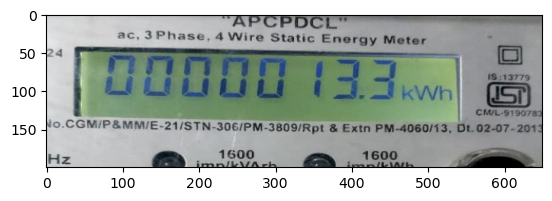

In [42]:
# Convert the image to RGB (if it's in BGR format)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

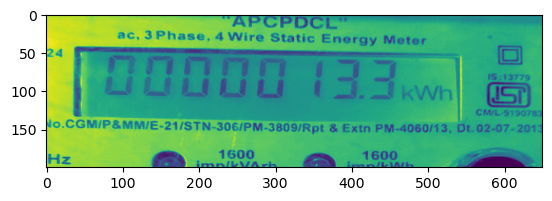

In [45]:

# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

### Template Matching Technique

In [35]:
# The Template to Match
face= cv2.imread('./Images/fm1.jpg')

apply_template_matching(cimg1, face)
apply_template_matching(cimg2, face)
apply_template_matching(cimg3, face)
apply_template_matching(cimg4, face)
apply_template_matching(cimg5, face)
apply_template_matching(cimg6, face)
apply_template_matching(cimg7, face)
apply_template_matching(cimg8, face)
apply_template_matching(cimg9, face)
apply_template_matching(cimg10, face)
apply_template_matching(cimg11, face)
apply_template_matching(cimg12, face)
apply_template_matching(cimg13, face)

### Edge Detection Techniques

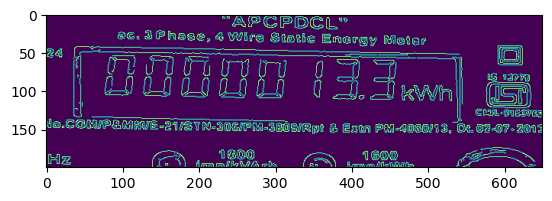

In [51]:
lower_threshold = 100  # Adjust these thresholds as needed
upper_threshold = 200

# Call the function to apply edge detection
edg = apply_edge_detection(img, lower_threshold, upper_threshold)
plt.imshow(edg)


### Segmentation  

Tried 
- Color Schemes
- Histogram Equalization 
- Gamma Adjustment


In [9]:
def apply_slic(image, color_scheme):
    image = image.copy()
    
    rgb_image = cv2.cvtColor(image, color_scheme)
    segments = slic(rgb_image, n_segments=2, compactness=10)
    
    # Find the label of the middle segment (assuming there are only two segments)
    unique_labels, label_counts = np.unique(segments, return_counts=True)
    middle_segment_label = unique_labels[np.argmax(label_counts)]
    
    # Find the coordinates of the bounding box for the middle segment
    rows, cols = np.where(segments == 1)
    s1x1, s1y1 = min(cols), min(rows)
    s1x2, s1y2 = max(cols), max(rows)
    
    # Find the coordinates of the bounding box for the middle segment
    rows, cols = np.where(segments == 2)
    s2x1, s2y1 = min(cols), min(rows)
    s2x2, s2y2 = max(cols), max(rows)

    # Crop the image based on the bounding box
    if s1x1 > s2x1 :
        cropped_image = image[s1y1:s1y2, s1x1:s1x2]
    else :
        cropped_image = image[s2y1:s2y2, s2x1:s2x2]
    return cropped_image

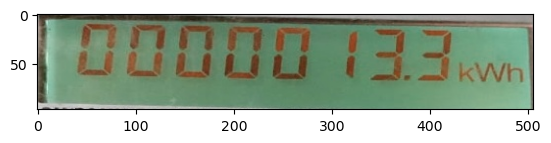

In [10]:
seg_img = apply_slic(cimg1,cv2.COLOR_BGR2RGB)

plt.imshow(seg_img)

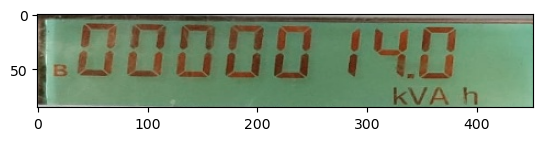

In [187]:
seg_img = apply_slic(cimg2,cv2.COLOR_BGR2HSV)

plt.imshow(seg_img)

In [143]:
gray_image = cv2.cvtColor(cimg3, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Convert the equalized image back to color if needed
equalized_color_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)


In [188]:
gamma = 1
gamma_corrected_image = np.power(cimg3 / 255.0, 1.0 / gamma)
gamma_corrected_image = np.uint8(gamma_corrected_image * 255)

In [ ]:
blurred_image = cv2.GaussianBlur(cimg16, (5,5), 0)
seg_img = apply_slic(cimg1)

plt.imshow(seg_img)

In [154]:
blurred_image = cv2.GaussianBlur(cimg3, (5,5), 0)

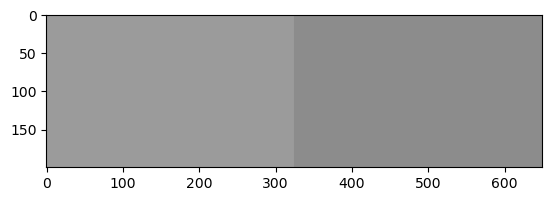

In [156]:
rgb_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
segments = slic(rgb_image, n_segments=2, compactness=10)
segmented_image = label2rgb(segments, image=rgb_image, kind='avg')
plt.imshow(segmented_image)

### Python Test Project Work 

In [21]:

def detect_edges(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred_image, 50, 150)  # You can adjust the threshold values as needed

    return edges

def detect_noise(image_path, threshold=100):
    # Read the image in grayscale mode
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    # Calculate the Laplacian of the image
    laplacian = cv.Laplacian(img, cv.CV_64F)

    # Calculate the absolute value of the Laplacian
    abs_laplacian = np.absolute(laplacian)
 
    noisy_regions = (abs_laplacian > threshold).astype(np.uint8) * 255

    return noisy_regions

def calculate_edge_distances(edges):
    # Find all non-zero edge points in the edges image
    edge_points = np.column_stack(np.where(edges > 0))
    # Calculate the distance between adjacent edge points
    distances = np.linalg.norm(np.diff(edge_points, axis=0), axis=1)
    return distances

def correct_ocr_mistakes(text):
    # Define a mapping of characters to replace
    char_mapping = {
        'l': '1',
        'I': '1',
        'x': '1',
        'o': '0',
        'z': '2', 
        'c': '2',
        'i':'0', 
    }

    # Use regular expressions to replace misinterpreted characters
    for wrong_char, correct_char in char_mapping.items():
        text = text.lower().replace(wrong_char, correct_char)
    return text

def view_full_array(array): 
    np.set_printoptions(threshold=np.inf)
    print(array)



In [12]:
reader = easyocr.Reader(['en'])          
results = reader.readtext(seg_img,detail=0)
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['dvoox33', 'kWh']

In [17]:
print(correct_ocr_mistakes(results[0]))

dv00133


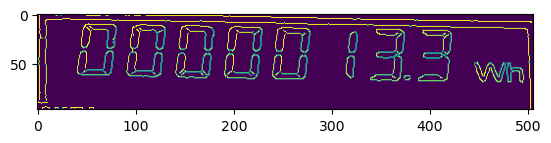

In [41]:
edge_image =detect_edges(seg_img)
plt.imshow(edge_image)

In [42]:
results = reader.readtext(edge_image,detail=0)
results


['888', '33']

In [34]:
lines = cv2.HoughLines(edge_image, 1, np.pi / 180, threshold=100)
import cv2 as cv

In [38]:
image = seg_img.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        # Filter lines that resemble rays based on their orientation and position
        if (theta > np.pi/3 and theta < 2*np.pi/3) or (theta > 4*np.pi/3 and theta < 5*np.pi/3):
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            # Draw the lines on the original image
            cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)


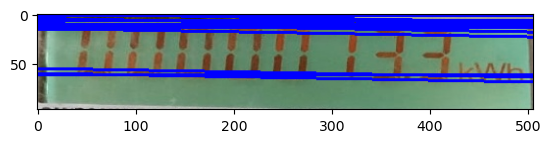

In [39]:
plt.imshow(image)

### Start working on Machine Learning Techniques 